<a href="https://colab.research.google.com/github/ivalozkaMIIGAiK/network/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### 1.2. Проектируем архитектуру для этой задачи

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [3]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 1688.6650 - mae: 34.4745 - val_loss: 357.1181 - val_mae: 16.3290
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 226.1781 - mae: 12.2862 - val_loss: 173.9951 - val_mae: 11.7011
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 158.4918 - mae: 9.9416 - val_loss: 106.2576 - val_mae: 7.2843
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 107.1643 - mae: 7.7216 - val_loss: 83.7198 - val_mae: 6.5618
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 114.5638 - mae: 7.5090 - val_loss: 83.9695 - val_mae: 6.7653
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 90.3173 - mae: 7.6644 - val_loss: 80.4761 - val_mae: 6.1977
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 85.3366 - mae: 6.5380 - val_loss: 76.8386 - val_mae: 6.3729
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 76.7898 - mae: 6.7205 - val_loss: 74.5358 - val_mae: 5.8532
Epoch 9/100
11/11 ━━━━━━━━━

#### 1.6. Делаем предсказания на тестовых данных

In [5]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [8]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE на тестовых данных: {mae}')

MAE на тестовых данных: 3.39041192367965


#### 1.8. Строим график обучения

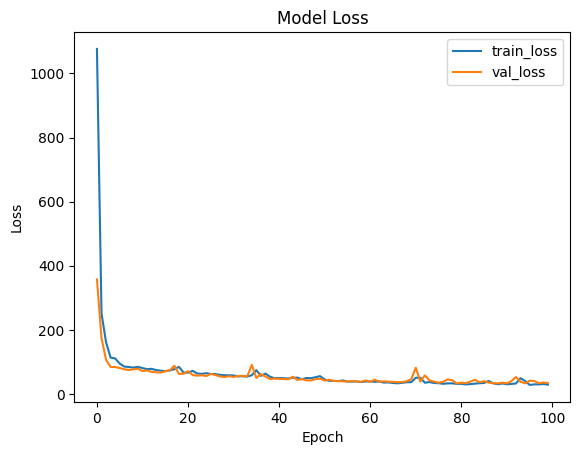

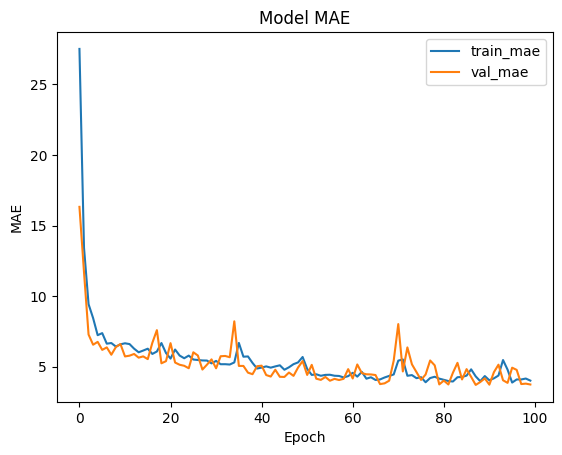

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [10]:
!pip install gradio
import gradio as gr
import numpy as np

feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

min_values = data.min(axis=0)
max_values = data.max(axis=0)

def predict_price(*features):
    features = np.array(features).reshape(1, -1)
    price = model.predict(features)[0][0]
    return f'Predicted Price: {price:.2f}'

inputs = [
    gr.Slider(minimum=min_values[i], maximum=max_values[i], label=feature_names[i])
    for i in range(13)
]

iface = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs='text',
    title='Boston Housing Price Prediction'
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


#### 2. Проверка обученной модели пользовательскими данными

In [11]:
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9876b38966c28ce8e3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [12]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [16]:
import kagglehub
path = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")

100%|██████████| 376M/376M [00:07<00:00, 53.0MB/s]

Extracting files...


### 3. Указываем путь к набору данных:

In [17]:
DATASET_PATH = "/content/animals/animals"

### 4. Загружаем набор данных и формируем общую выборку:

In [18]:
allowed_classes = ['cats', 'dogs', 'panda']
imagePaths = list(paths.list_images(path))
imagePaths = [p for p in imagePaths if p.split(os.path.sep)[-2] in allowed_classes]
random.shuffle(imagePaths)

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    image = image.flatten()
    data.append(image)
    labels.append(label)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [19]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [21]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [23]:
model = Sequential()
model.add(Dense(1024, input_shape=(32*32*3,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [24]:
INIT_LR = 0.001
EPOCHS = 100

#### 5.3. Компилируем модель:

In [25]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=INIT_LR),
              metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

#### 6.2. Запустим процесс обучения модели:

In [27]:
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=EPOCHS,
    batch_size=1000,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.3229 - loss: 2.9002

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 951ms/step - accuracy: 0.3256 - loss: 2.9512 - val_accuracy: 0.3327 - val_loss: 1.4767
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 860ms/step - accuracy: 0.3517 - loss: 1.4042 - val_accuracy: 0.3267 - val_loss: 1.1338
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.3457 - loss: 1.1471

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 570ms/step - accuracy: 0.3487 - loss: 1.1435 - val_accuracy: 0.4993 - val_loss: 1.0137
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.4422 - loss: 1.0292 - val_accuracy: 0.4920 - val_loss: 1.0563
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step - accuracy: 0.5007 - loss: 1.0004 - val_accuracy: 0.4940 - val_loss: 0.9643
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.5241 - loss: 0.9346

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.5253 - loss: 0.9333 - val_accuracy: 0.5207 - val_loss: 0.9250
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.5366 - loss: 0.9007

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 694ms/step - accuracy: 0.5382 - loss: 0.8990 - val_accuracy: 0.5460 - val_loss: 0.8887
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.5688 - loss: 0.8657 - val_accuracy: 0.5213 - val_loss: 0.9126
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5635 - loss: 0.8671

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.5630 - loss: 0.8666 - val_accuracy: 0.5627 - val_loss: 0.8822
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.5748 - loss: 0.8578

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.5752 - loss: 0.8572 - val_accuracy: 0.5647 - val_loss: 0.8585
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.5822 - loss: 0.8408 - val_accuracy: 0.5493 - val_loss: 0.8851
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.5660 - loss: 0.8433 - val_accuracy: 0.5633 - val_loss: 0.8457
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.6071 - loss: 0.8109

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 385ms/step - accuracy: 0.6067 - loss: 0.8109 - val_accuracy: 0.5667 - val_loss: 0.8489
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6084 - loss: 0.7924

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step - accuracy: 0.6077 - loss: 0.7950 - val_accuracy: 0.5767 - val_loss: 0.8381
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.6147 - loss: 0.7961 - val_accuracy: 0.5473 - val_loss: 0.8909
Epoch 16/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.5744 - loss: 0.8286

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - accuracy: 0.5757 - loss: 0.8258 - val_accuracy: 0.5853 - val_loss: 0.8237
Epoch 17/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.6044 - loss: 0.7816

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.6036 - loss: 0.7826 - val_accuracy: 0.5867 - val_loss: 0.8291
Epoch 18/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - accuracy: 0.6314 - loss: 0.7714 - val_accuracy: 0.5813 - val_loss: 0.8241
Epoch 19/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.6084 - loss: 0.7852

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.6081 - loss: 0.7841 - val_accuracy: 0.5927 - val_loss: 0.8223
Epoch 20/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.6297 - loss: 0.7676

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.6287 - loss: 0.7670 - val_accuracy: 0.6073 - val_loss: 0.8046
Epoch 21/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.6503 - loss: 0.7430

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.6497 - loss: 0.7431 - val_accuracy: 0.6080 - val_loss: 0.7980
Epoch 22/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6513 - loss: 0.7280

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step - accuracy: 0.6511 - loss: 0.7284 - val_accuracy: 0.6093 - val_loss: 0.7938
Epoch 23/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - accuracy: 0.6602 - loss: 0.7206 - val_accuracy: 0.5987 - val_loss: 0.7904
Epoch 24/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - accuracy: 0.6562 - loss: 0.7216 - val_accuracy: 0.6027 - val_loss: 0.7822
Epoch 25/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - accuracy: 0.6644 - loss: 0.7030 - val_accuracy: 0.6047 - val_loss: 0.8275
Epoch 26/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.6582 - loss: 0.7195

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step - accuracy: 0.6601 - loss: 0.7167 - val_accuracy: 0.6187 - val_loss: 0.7672
Epoch 27/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 374ms/step - accuracy: 0.6847 - loss: 0.6765 - val_accuracy: 0.5740 - val_loss: 0.8345
Epoch 28/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.6423 - loss: 0.7145

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - accuracy: 0.6444 - loss: 0.7117 - val_accuracy: 0.6260 - val_loss: 0.7662
Epoch 29/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6955 - loss: 0.6686

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.6961 - loss: 0.6675 - val_accuracy: 0.6327 - val_loss: 0.7475
Epoch 30/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.7069 - loss: 0.6371 - val_accuracy: 0.6160 - val_loss: 0.8061
Epoch 31/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 535ms/step - accuracy: 0.6766 - loss: 0.6905 - val_accuracy: 0.5573 - val_loss: 1.0750
Epoch 32/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.6168 - loss: 0.8232 - val_accuracy: 0.6120 - val_loss: 0.7691
Epoch 33/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6702 - loss: 0.7056

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.6710 - loss: 0.7043 - val_accuracy: 0.6347 - val_loss: 0.7508
Epoch 34/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - accuracy: 0.6989 - loss: 0.6532 - val_accuracy: 0.5927 - val_loss: 0.8232


#### 6.3. Загружаем лучшую модель:

In [28]:
model.load_weights("best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [33]:
predictions = model.predict(testX, batch_size=1000)
class_names = ['cats', 'dogs', 'panda']  # Укажите ваши классы
print(classification_report(
    testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=class_names
))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
              precision    recall  f1-score   support

        cats       0.61      0.55      0.57       502
        dogs       0.50      0.63      0.56       498
       panda       0.87      0.73      0.79       500

    accuracy                           0.63      1500
   macro avg       0.66      0.63      0.64      1500
weighted avg       0.66      0.63      0.64      1500



#### 7.2. Выведем матрицу ошибок

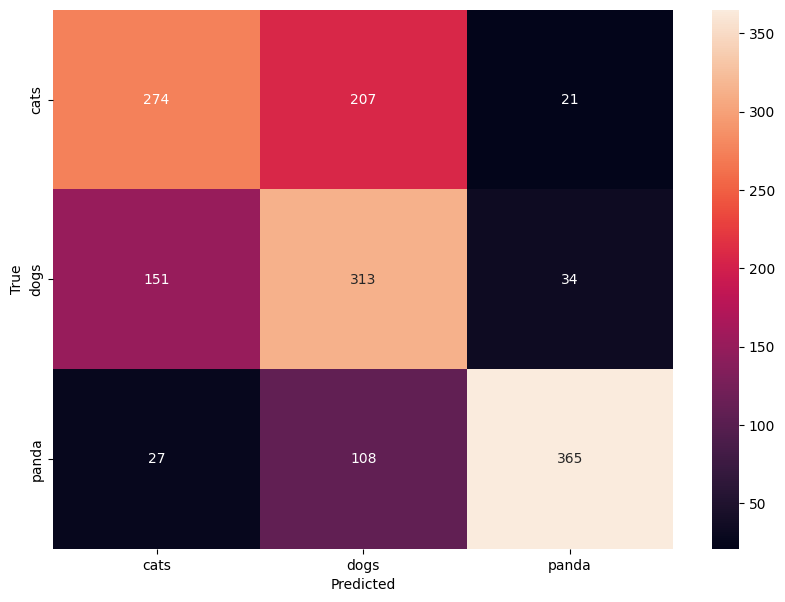

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### 7.3. Отобразим график обучения

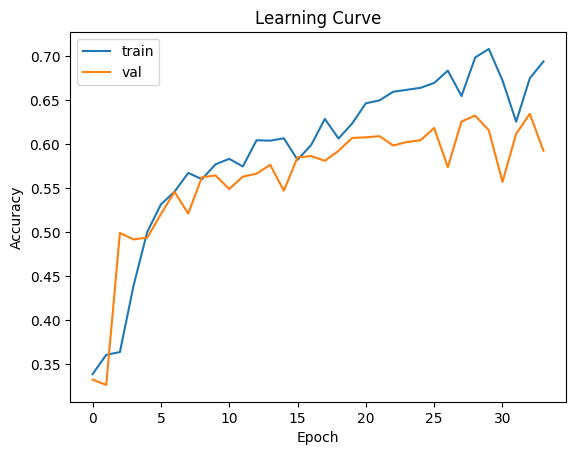

In [37]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 8. Сохранение модели и меток классов:

In [38]:
model.save("trained_model.keras")
with open("label_bin.pickle", "wb") as f:
    pickle.dump(lb, f)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [39]:
import cv2
import numpy as np
import pickle
from tensorflow.keras.models import load_model

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [40]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32)).flatten()
    image = image.astype("float") / 255.0
    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [43]:
def predict_image(image_path, model, lb):
    image = preprocess_image(image_path)
    image = image.reshape(1, -1)
    prediction = model.predict(image)
    class_idx = np.argmax(prediction)
    class_label = class_names[class_idx]
    return class_label

### 10. Визуализируем интерфейс и произведем классификацию:

In [44]:
!pip install gradio
import gradio as gr

model = load_model("trained_model.keras")
with open("label_bin.pickle", "rb") as f:
    lb = pickle.load(f)

def classify_image(image):
    image = cv2.resize(image, (32, 32)).flatten()
    image = image.astype("float") / 255.0
    image = image.reshape(1, -1)
    prediction = model.predict(image)
    class_idx = np.argmax(prediction)
    class_label = class_names[class_idx]
    return class_label

iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs='text',
    title='Image Classifier: Cats, Dogs, Pandas'
)

iface.launch()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7212f8e4d9f16ccc06.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
